# Linear Regression Model

In [55]:
# Import libraries

import numpy as np
import pandas as pd
import hvplot.pandas
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

import warnings
warnings.filterwarnings('ignore')

In [56]:
# Load the cleaned hotel booking data into the workbook and convert to pandas Dataframe
city_csv_path = Path('../Resources/City_hotel_Prep.csv')
resort_csv_path = Path('../Resources/Resort_Hotel_Prep.csv')

city_df = pd.read_csv(city_csv_path)
resort_df = pd.read_csv(resort_csv_path)


In [57]:
# Drop unamed row
city_df = city_df.drop(columns = ['Unnamed: 0', 'hotel'])
resort_df = resort_df.drop(columns = ['Unnamed: 0', 'hotel'])

In [58]:
city_df.head()

,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,meal,market_segment,reserved_room_type,customer_type,adr,total_of_special_requests,date
0,88,27,0,4,2,BB,Online TA,A,Transient,80.0,1,2015-07-01
1,65,27,0,4,1,BB,Online TA,A,Transient,70.0,1,2015-07-01
2,92,27,2,4,2,BB,Online TA,A,Transient,80.0,2,2015-07-01
3,100,27,0,2,2,BB,Online TA,A,Transient,80.0,1,2015-07-02
4,79,27,0,3,2,BB,Online TA,A,Transient,80.0,1,2015-07-02


In [59]:
# Create a scatter plot of the data
city_df.hvplot(kind = 'scatter', x = 'date', y = 'adr')

:Scatter   [date]   (adr)

In [60]:
avg = city_df.filter(['adr','arival_date'], axis=1)
avg.head()

,adr
0,80.0
1,70.0
2,80.0
3,80.0
4,80.0


In [7]:
avg['arival_date']= pd.to_datetime(avg['arival_date'])
avg = avg.set_index('arival_date')
avg.head()

,adr
arival_date,
2015-07-01,76.5
2015-07-01,68.0
2015-07-01,76.5
2015-07-02,76.5
2015-07-02,76.5


In [8]:
avg.plot.hist

<bound method FramePlotMethods.hist of <pandas.plotting._core.FramePlotMethods object at 0x00000239449805C8>>

In [31]:
avg_price = avg.resample('W').mean().dropna()

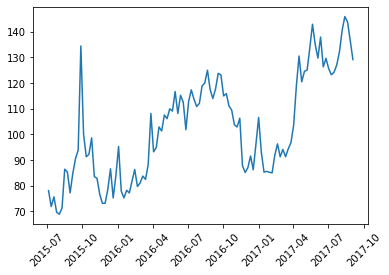

In [32]:
plt.xticks(rotation=45)
plt.plot(avg_price)

In [11]:
# Create a Linear Regression Model using sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [12]:
# Separate the data into the X and y components
X = city_df.index.values.reshape(-1,1)
y = city_df['adr']

In [13]:
X

array([[    0],
       [    1],
       [    2],
       ...,
       [77890],
       [77891],
       [77892]], dtype=int64)

In [14]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [15]:
# Make predictions using the X data
predicted_y_values = model.predict(X)
predicted_y_values

array([ 94.37642048,  94.37674846,  94.37707645, ..., 119.92301907,
       119.92334705, 119.92367503])

In [54]:
plt.scatter(X.date, y)
plt.plot(X, predicted_y_values, color='red')

AttributeError: 'numpy.ndarray' object has no attribute 'date'

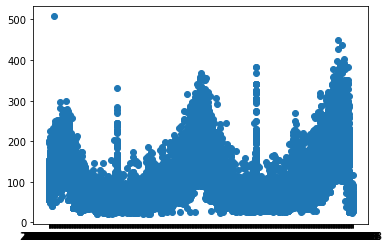

In [17]:
# Create a scatter plot of the data
plt.scatter(resort_df.arival_date, resort_df.adr)

In [33]:
resort_avg = resort_df.filter(['adr','arival_date'], axis=1)
resort_avg['arival_date']= pd.to_datetime(resort_avg['arival_date'])
resort_avg = resort_avg.set_index('arival_date')
resort_avg_price = resort_avg.resample('W').mean().dropna()

In [34]:
resort_avg_price.head()

,adr
arival_date,
2015-07-05,103.127431
2015-07-12,115.213872
2015-07-19,131.730833
2015-07-26,144.029935
2015-08-02,149.506986


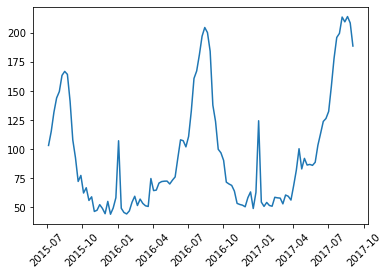

In [35]:
# Create a scatter plot of the data
plt.xticks(rotation=45)
plt.plot(resort_avg_price) # Overlay the graphs

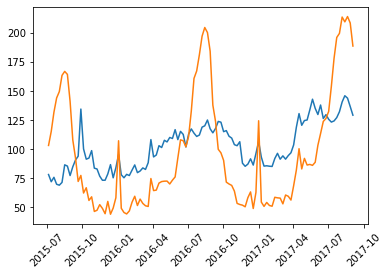

In [40]:
plt.xticks(rotation=45)
plt.plot(avg_price, label = 'City Hotels')
plt.plot(resort_avg_price, label = 'Resort Hotels')

In [21]:
# Create a Linear Regression Model using sklearn
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

# Separate the data into the X and y components
X = resort_df.index.values.reshape(-1,1)
y = resort_df['adr']

# Fit the model to the data
model2.fit(X, y)

# Make predictions using the X data
predicted_y_values2 = model2.predict(X)
predicted_y_values2

array([ 91.17033714,  91.17064564,  91.17095414, ..., 103.23659418,
       103.23690268, 103.23721117])

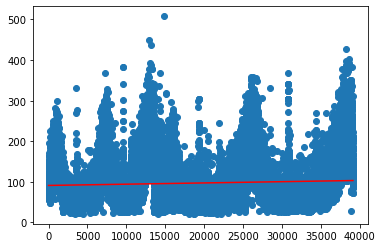

In [22]:
plt.scatter(X, y)
plt.plot(X, predicted_y_values2, color='red')

In [23]:
predicted_y_values2

array([ 91.17033714,  91.17064564,  91.17095414, ..., 103.23659418,
       103.23690268, 103.23721117])

In [26]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = pd.DataFrame(y)
Results["Predicted Value"] = predicted_y_values2
# Results.sort_values(["arival_date"], axis=0, ascending=True, inplace=True)
Results['Diff'] = Results['Predicted Value'] - Results.adr
Results

,adr,Predicted Value,Diff
0,75.00,91.170337,16.170337
1,75.00,91.170646,16.170646
2,98.00,91.170954,-6.829046
3,98.00,91.171263,-6.828737
4,107.00,91.171571,-15.828429
5,103.00,91.171880,-11.828120
6,82.00,91.172188,9.172188
7,105.50,91.172497,-14.327503
8,123.00,91.172805,-31.827195
9,145.00,91.173114,-53.826886


In [42]:
Results.Diff.hvplot(kind = 'scatter')

:Scatter   [index]   (Diff)

In [53]:
Results.Diff.abs().mean()

47.60851652893506

In [51]:
Results.Diff.abs().max()

412.2608170325308

In [52]:
Results.Diff.abs().min()

0.00022262925249094678